# Leads Scoring Assignment
#### Below are the list of steps that we performed for creating a logistic regression model
- Importing all libraries
- Reading and understanding the data - missing values treatment, checking for outliers etc
- Data Preparation
- Train-test split
- Feature scaling
- Checking correlations
- Model Building
- Precision and Recall
- Making predictions on the test data set

## 1. Importing all the required libraries

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import copy

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

## 2. Reading and cleaning the data

In [2]:
leads_df = pd.read_csv("Leads.csv")

In [3]:
pd.set_option('display.max_columns',500)
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads_df.shape

(9240, 37)

In [5]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Outliers treatment

In [6]:
#Checking for outliers in the continuous variables
num_leads = leads_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score',
                      'Asymmetrique Profile Score']]
num_leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,3.445238,487.698268,2.362820,14.306252,16.344883
std,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,7.000000,11.000000
25%,1.000000,12.000000,1.000000,14.000000,15.000000
50%,3.000000,248.000000,2.000000,14.000000,16.000000
75%,5.000000,936.000000,3.000000,15.000000,18.000000
90%,7.000000,1380.000000,5.000000,16.000000,19.000000
95%,10.000000,1562.000000,6.000000,17.000000,20.000000
99%,17.000000,1840.610000,9.000000,17.000000,20.000000


In [7]:
#There seems to be an outlier Total visits and Page views per visit
#However, it could be possible that the candidate visited the website many times to contemplate their decision

In [8]:
leads_df.sort_values(by = 'TotalVisits', ascending = False).head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
6102,f787f694-b4c4-4763-a4ae-9f39a0a052b6,602958,Landing Page Submission,Direct Traffic,No,No,1,251.0,49,1.48,Page Visited on Website,India,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Not Sure,No,No,Select,Mumbai,NaN,NaN,NaN,NaN,No,Yes,Page Visited on Website
2322,272696ed-4aff-4b42-8829-b63f122493d9,637257,Landing Page Submission,Direct Traffic,Yes,No,0,141.0,755,6.71,Page Visited on Website,India,Human Resource Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,Yes,Page Visited on Website


In [9]:
#We see that the candidate who had the highest number of visits is interested in other courses
#Hence this candidate must be browsing through all of the courses provided by Education X
#And hence has high number of visits to the website
#He could also be a potential lead, so will not remove this outlier

In [10]:
#Checking missing data percentages
round(100*(leads_df.isnull().sum()/len(leads_df)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
count = 0
for i in leads_df.isnull().sum(axis=1):
    if i>0:
        count+=1
print("The number of rows with missing values is",round(100*(count/len(leads_df.index)),2),"%")

The number of rows with missing values is 78.97 %


#### We see that there is a lot of missing data, let us go column by column and either impute the missing values or delete the column

In [12]:
#Dropping columns with high number of missing values
leads_df = leads_df.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
               'Asymmetrique Profile Score','Lead Quality'],axis=1)

In [13]:
#Creating a list of categorical variables so as to replace the Yes and No with binary codes
var_list=['Do Not Email', 'Do Not Call', 'Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
          'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
          'Update me on Supply Chain Content', 'Get updates on DM Content', 
          'I agree to pay the amount through cheque','A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes':1, 'No': 0})
leads_df[var_list] = leads_df[var_list].apply(binary_map)

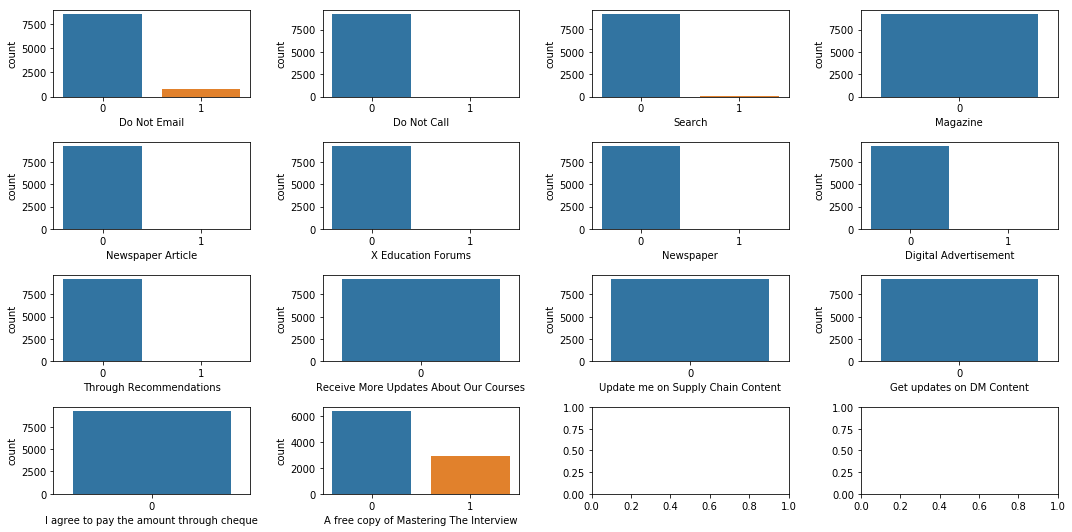

In [14]:
#Checking the value counts of the categorical variables to see the distribution

fig,axs=plt.subplots(4,4, figsize = (15,7.5))
plt1 = sns.countplot(leads_df['Do Not Email'], ax = axs[0,0])
plt2 = sns.countplot(leads_df['Do Not Call'], ax = axs[0,1])
plt3 = sns.countplot(leads_df['Search'], ax = axs[0,2])
plt4 = sns.countplot(leads_df['Magazine'], ax = axs[0,3])
plt5 = sns.countplot(leads_df['Newspaper Article'], ax = axs[1,0])
plt6 = sns.countplot(leads_df['X Education Forums'], ax = axs[1,1])
plt7 = sns.countplot(leads_df['Newspaper'], ax = axs[1,2])
plt8 = sns.countplot(leads_df['Digital Advertisement'], ax = axs[1,3])
plt9 = sns.countplot(leads_df['Through Recommendations'], ax = axs[2,0])
plt10 = sns.countplot(leads_df['Receive More Updates About Our Courses'], ax = axs[2,1])
plt11 = sns.countplot(leads_df['Update me on Supply Chain Content'], ax = axs[2,2])
plt12 = sns.countplot(leads_df['Get updates on DM Content'], ax = axs[2,3])
plt13 = sns.countplot(leads_df['I agree to pay the amount through cheque'], ax = axs[3,0])
plt14 = sns.countplot(leads_df['A free copy of Mastering The Interview'], ax = axs[3,1])
plt.tight_layout()
plt.show()

In [15]:
#We see that five of the above variables will have no impact on the final lead conversion since all have chosen
#no as the answer for the questions raised above. Hence, dropping all those columns
leads_df = leads_df.drop(['Magazine','Receive More Updates About Our Courses',
          'Update me on Supply Chain Content', 'Get updates on DM Content', 
          'I agree to pay the amount through cheque'], axis=1)

In [16]:
#Specialization
leads_df['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [17]:
#Since 'Select' is not a specialization and basically means that the candidates do not have/or have declined to mention 
#a specialization. So replacing Select with No specialization
leads_df['Specialization'].replace(to_replace ="Select", 
                 value = 'No Specialization', inplace = True)

In [18]:
#Filling the null values as No specialization as well
leads_df['Specialization'].fillna("No Specialization",inplace = True)

In [19]:
#City
leads_df['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [20]:
#Checking the number of null values in city column
leads_df.City.isnull().sum()

1420

In [21]:
#Replacing the null values with Other Cities
leads_df['City'].fillna("Other Cities", inplace = True)

In [22]:
#Country
leads_df.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
Canada                     4
Germany                    4
Kuwait                     4
South Africa               4
Sweden                     3
Ghana                      2
Belgium                    2
Bangladesh                 2
Netherlands                2
Philippines                2
Italy                      2
Uganda                     2
Asia/Pacific Region        2
China                      2
Indonesia                  1
Sri Lanka                  1
Denmark                    1
Vietnam                    1
Kenya                      1
Russia                     1
Malaysia      

In [23]:
#Since most of the candidates are from India, lets impute the missing values as India as well
leads_df['Country'].fillna("India", inplace = True)

In [24]:
#How did you hear about X Education
print(leads_df['How did you hear about X Education'].value_counts(),"Count of missing values:",leads_df['How did you hear about X Education'].isnull().sum())

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64 Count of missing values: 2207


In [25]:
#Since select and missing values are the same, we calculate what percent of missing values exists for this ccolumn
(2207+5043)/len(leads_df)

0.7846320346320347

In [26]:
#With the number of "Select" variable counts and null values, the real amount of missing values is 78% which is very high
#Hence dropping this column
leads_df = leads_df.drop(['How did you hear about X Education'], axis=1)

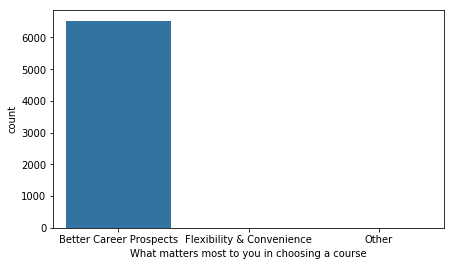

In [27]:
#What matters most to you in choosing a course
plt.figure(figsize=(7,4))
sns.countplot(x='What matters most to you in choosing a course', data=leads_df)

In [28]:
#The choice "Better career prospects" dominates the above question.Hence imputing the missing values with the same
leads_df['What matters most to you in choosing a course'].fillna("Better Career Prospects", inplace = True)

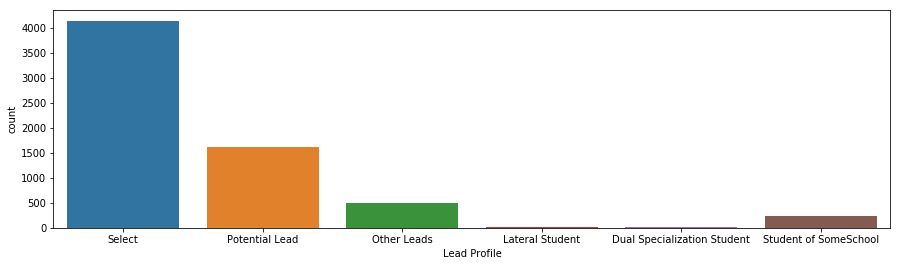

In [29]:
#Lead Profile
plt.figure(figsize=(15,4))
sns.countplot(x='Lead Profile', data=leads_df)

In [30]:
#Checking the value counts
leads_df['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [31]:
#Calculating the real percent of missing values since Select is also essentially a null value 
(4146+leads_df['Lead Profile'].isnull().sum())/len(leads_df)

0.7418831168831169

In [32]:
#As the missing values are very high at 74%, we will drop this column
leads_df = leads_df.drop(['Lead Profile'], axis=1)

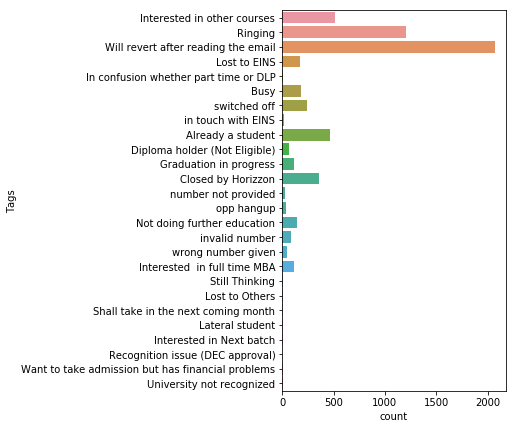

In [33]:
#Tags
plt.figure(figsize=(4,7))
sns.countplot(y='Tags', data=leads_df)

In [34]:
#The reason there could be null values for Tags is because the Sales department probably was not sure of what to enter.
#The safest option around this is to impute these null values as "Still Thinking" since that gives a probable
#50/50 ratio on whether or not the candidate will convert
leads_df['Tags'].fillna("Still Thinking", inplace = True)

In [35]:
#What is your current occupation
leads_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [36]:
#Checking the number of missing values
leads_df['What is your current occupation'].isnull().sum()

2690

In [37]:
#Replacing null values with unemployed, since the candidates that didnt choose their occupation most likely are not working
leads_df['What is your current occupation'].fillna("Unemployed", inplace = True)

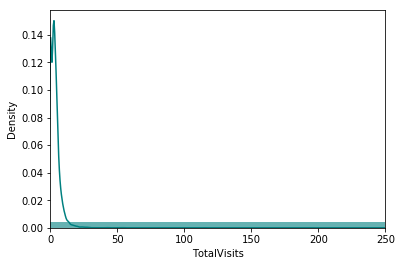

In [38]:
#Total visits
ax = leads_df["TotalVisits"].hist(bins=1, density=True, stacked=True, color='teal', alpha=0.6)
leads_df["TotalVisits"].plot(kind='density', color='teal')
ax.set(xlabel='TotalVisits')
plt.xlim(0,250)
plt.show()

In [39]:
#Since the above plot is skewed towards 0, meaning that most total visits are 0, we cannot impute missing values by mean
#Hence imputing with median
leads_df['TotalVisits'].fillna(leads_df['TotalVisits'].median(), inplace = True)

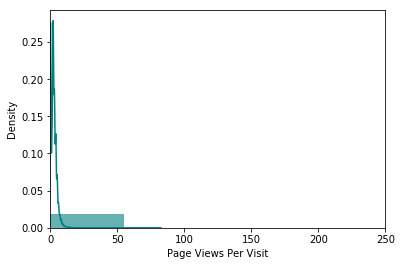

In [40]:
#Page Views Per Visit
ax = leads_df["Page Views Per Visit"].hist(bins=1, density=True, stacked=True, color='teal', alpha=0.6)
leads_df["Page Views Per Visit"].plot(kind='density', color='teal')
ax.set(xlabel='Page Views Per Visit')
plt.xlim(0,250)
plt.show()

In [41]:
#Since the above plot is also skewed towards 0, imputing the null values with median rather than mean
leads_df['Page Views Per Visit'].fillna(leads_df['Page Views Per Visit'].median(), inplace = True)

In [42]:
#Last Activity and Last Notable Activity since both have familiar categories
#Hence deleting the column with missing values
leads_df.drop(['Last Activity'], axis=1, inplace = True)

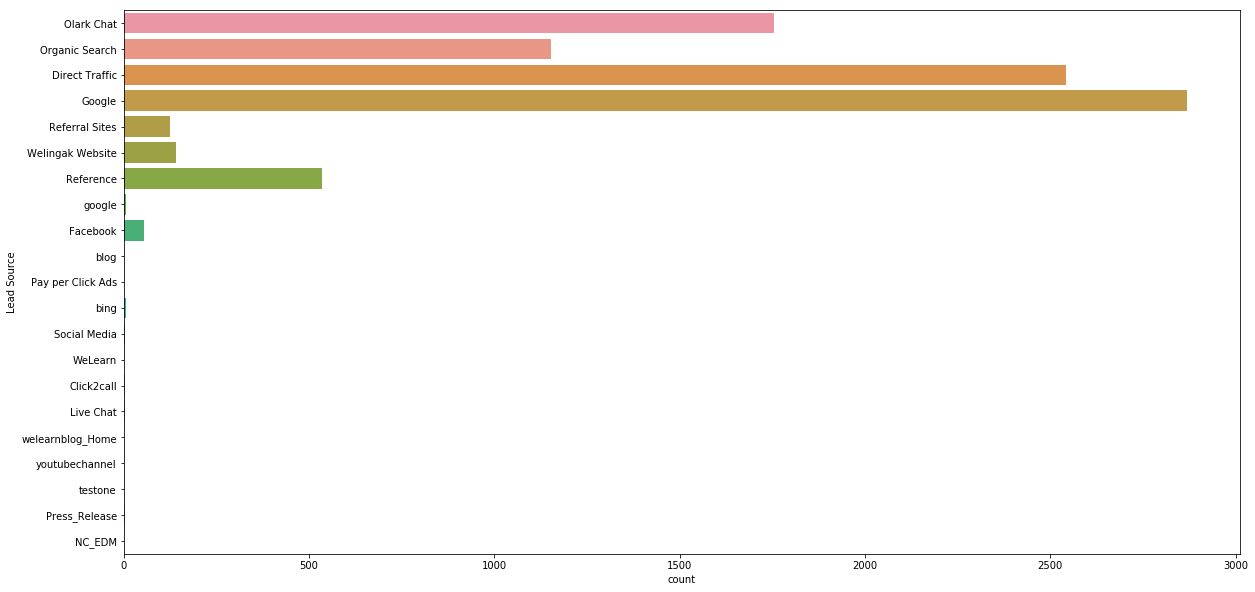

In [43]:
#Lead Source
plt.figure(figsize=(20,10))
sns.countplot(y='Lead Source', data=leads_df)

In [44]:
#Since there are only 0.39% missing values in Lead source, imputing the null values with the highest frequency variable
leads_df['Lead Source'].fillna('Google', inplace = True)

In [45]:
#Also, dropping prospect ID since lead number and prospect ID are unique values to identify the lead. Retaining one and 
#dropping the other
leads_df = leads_df.drop(['Prospect ID'], axis=1)

In [46]:
round(100*(leads_df.isnull().sum()/len(leads_df)),2)

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [47]:
count = 0
for i in leads_df.isnull().sum(axis=1):
    if i>0:
        count+=1
print("The number of rows with missing values is",round(100*(count/len(leads_df.index)),2),"%")

The number of rows with missing values is 0.0 %


#### We see that none of the columns and rows have any missing values now. We can now proceed with modelling

## 3. Data Preparation

#### Treating categorical variables using dummy variables and binary variables. We have already dealt with the categorical variables with binary data. Let us treat the remaining ones with dummy variables

In [48]:
leads_df2 = pd.get_dummies(leads_df)
leads_df2.columns

Index(['Lead Number', 'Do Not Email', 'Do Not Call', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Search', 'Newspaper Article', 'X Education Forums',
       ...
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=155)

## 4.Train test split

In [49]:
# Putting feature variable to X
X = leads_df2.drop(['Lead Number','Converted'], axis=1)

In [50]:
# Putting response variable to y
y = leads_df2['Converted']

In [51]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## 5. Feature Scaling

In [52]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit',]] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

C:\Users\sneha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sneha\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_No Specialization,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to email

## 6. Looking at correlations

In [53]:
#Since the number of columns are very high, it doesn't make sense to check the heatmap as we will not be able to decipher much
#from it. Deleting the columns which are highly correlated (more than 95%)
leads_df_corr = leads_df.corr().abs()
upper = leads_df_corr.where(np.triu(np.ones(leads_df_corr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

[]

In [54]:
#There are no variables that have a correlation of above 95%
X_train.drop(X_train[to_drop],axis=1,inplace= True)

## 7. Model Building

In [55]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                          136
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 26 Aug 2019   Deviance:                          nan
Time:                        23:53:35   Pearson chi2:                 2.59e+18
No. Iterations:                   100   Covariance Type:             nonrobust
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                   -1.249e+15   1.76e+07   -7.1e+07      0.000   -1.25e+15   -1.25e+15
Do Not Email                                                            -2.795e+14   3.56e+06  -7.86e+07      0.000   -2.79e+14   -2.79e+14
Do Not Call                                                              4.175e+14   4.77e+07   8.75e+06      0.000    4.18e+14    4.18e+14
TotalVisits                                                              9.237e+12   9.94e+05   9.29e+06      0.000    9.24e+12    9.24e+12
Total Time Spent on Website                                              5.339e+13      1e+06   5.32e+07      0.000    5.34e+13    5.34e+13
Page Views Per Visit                                                    -5.007e+13   1.18e+06  -4.23e+07      0.000   -5.01e+13   -5.01e+13
Search                                                                  -3.892e+13   2.21e+07  -1.76e+06      0.000   -3.89e+13   -3.89e+13
Newspaper Article                                                        5.461e+15   6.74e+07    8.1e+07      0.000    5.46e+15    5.46e+15
X Education Forums                                                      -6.568e+15   1.12e+08  -5.88e+07      0.000   -6.57e+15   -6.57e+15
Newspaper                                                               -1.933e+15   6.73e+07  -2.87e+07      0.000   -1.93e+15   -1.93e+15
Digital Advertisement                                                   -2.363e+15   4.82e+07   -4.9e+07      0.000   -2.36e+15   -2.36e+15
Through Recommendations                                                  2.913e+14   2.86e+07   1.02e+07      0.000    2.91e+14    2.91e+14
A free copy of Mastering The Interview                                   1.634e+14   2.69e+06   6.07e+07      0.000    1.63e+14    1.63e+14
Lead Origin_API                                                         -1.534e+15    1.6e+07  -9.59e+07      0.000   -1.53e+15   -1.53e+15
Lead Origin_Landing Page Submission                                     -1.623e+15    1.6e+07  -1.02e+08      0.000   -1.62e+15   -1.62e+15
Lead Origin_Lead Add Form                                               -1.706e+15   1.88e+07  -9.06e+07      0.000   -1.71e+15   -1.71e+15
Lead Origin_Lead Import                                                 -4.454e+13   4.24e+07  -1.05e+06      0.000   -4.45e+13   -4.45e+13
Lead Origin_Quick Add Form                                               3.659e+15   5.65e+07   6.48e+07      0.000    3.66e+15    3.66e+15
Lead Source_Click2call                                                   1.665e+15   4.13e+07   4.03e+07      0.000    1.66e+15    1.66e+15
Lead Source_Direct Traffic                                               2.204e+14

### Feature selection using RFE

In [56]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [57]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)           
rfe = rfe.fit(X_train, y_train)

In [58]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 11),
 ('Do Not Call', False, 100),
 ('TotalVisits', False, 76),
 ('Total Time Spent on Website', False, 7),
 ('Page Views Per Visit', False, 110),
 ('Search', False, 37),
 ('Newspaper Article', False, 81),
 ('X Education Forums', False, 75),
 ('Newspaper', False, 74),
 ('Digital Advertisement', False, 38),
 ('Through Recommendations', False, 116),
 ('A free copy of Mastering The Interview', False, 113),
 ('Lead Origin_API', False, 10),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', False, 29),
 ('Lead Origin_Lead Import', False, 128),
 ('Lead Origin_Quick Add Form', False, 64),
 ('Lead Source_Click2call', False, 80),
 ('Lead Source_Direct Traffic', False, 51),
 ('Lead Source_Facebook', False, 50),
 ('Lead Source_Google', False, 54),
 ('Lead Source_Live Chat', False, 127),
 ('Lead Source_NC_EDM', False, 28),
 ('Lead Source_Olark Chat', False, 21),
 ('Lead Source_Organic Search', False, 52),
 ('Lead Source_Pay per Click Ads', F

In [59]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement',
       ...
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=138)

### Assessing the model with StatsModels

In [60]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1497.9
Date:                Mon, 26 Aug 2019   Deviance:                       2995.8
Time:                        23:54:03   Pearson chi2:                 1.18e+04
No. Iterations:                    23   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.8051      0.062    -29.214      0.000      -1.926      -1.684
Lead Source_Welingak Website                 4.5316      0.730      6.204      0.000       3.100       5.963
Tags_Already a student                      -3.2887      0.712     -4.619      0.000      -4.684      -1.893
Tags_Closed by Horizzon                      7.2484      1.004      7.219      0.000       5.280       9.216
Tags_Diploma holder (Not Eligible)         -22.7610   1.91e+04     -0.001      0.999   -3.75e+04    3.74e+04
Tags_Interested  in full time MBA           -1.8712      0.719     -2.604      0.009      -3.280      -0.463
Tags_Interested in other courses            -1.8964      0.319     -5.940      0.000      -2.522      -1.271
Tags_Lost to EINS                            5.7942      0.716      8.089      0.000       4.390       7.198
Tags_Not doing further education            -3.1063      1.017     -3.056      0.002      -5.099      -1.114
Tags_Ringing                                -3.4595      0.227    -15.219      0.000      -3.905      -3.014
Tags_Will revert after reading the email     4.6210      0.164     28.151      0.000       4.299       4.943
Tags_invalid number                         -4.0357      1.025     -3.937      0.000      -6.045      -2.026
Tags_number not provided                   -24.2227   2.54e+04     -0.001      0.999   -4.98e+04    4.98e+04
Tags_switched off                           -3.9596      0.521     -7.602      0.000      -4.980      -2.939
Tags_wrong number given                    -24.2357   2.09e+04     -0.001      0.999    -4.1e+04     4.1e+04
Last Notable Activity_SMS Sent               2.8103      0.120     23.454      0.000       2.575       3.045
============================================================================================================
"""

In [61]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.005145
6795    0.141237
3516    0.005145
8105    0.079131
3934    0.141237
4844    0.996411
3297    0.005145
8071    0.995694
987     0.141237
7423    0.996411
dtype: float64

In [62]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00514511, 0.14123717, 0.00514511, 0.0791311 , 0.14123717,
       0.99641095, 0.00514511, 0.99569359, 0.14123717, 0.99641095])

### Creating a dataframe with the predicted converted rate and the predicted probablities

In [63]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['ProspectID'] = y_train.index
temp_df = y_train_pred_final
y_train_pred_final.head()

,Converted,Conv_Prob,ProspectID
0,0,0.005145,1871
1,0,0.141237,6795
2,0,0.005145,3516
3,0,0.079131,8105
4,0,0.141237,3934


In [64]:
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conv_Prob,ProspectID,predicted
0,0,0.005145,1871,0
1,0,0.141237,6795,0
2,0,0.005145,3516,0
3,0,0.079131,8105,0
4,0,0.141237,3934,0


### Confusion matrix

In [65]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3845  157]
 [ 337 2129]]


In [66]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9236239950525664


### Checking VIFs

In [67]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Tags_switched off,1.03
0,Lead Source_Welingak Website,1.02
2,Tags_Closed by Horizzon,1.01
10,Tags_invalid number,1.01
3,Tags_Diploma holder (Not Eligible),1.00
4,Tags_Interested in full time MBA,1.00
6,Tags_Lost to EINS,1.00
7,Tags_Not doing further education,1.00
11,Tags_number not provided,1.00
13,Tags_wrong number given,1.00


#### Since all the VIFs are pretty low, we won't drop any columns based on VIFs however we will drop a few columns based on p value

In [69]:
col = col.drop('Tags_Diploma holder (Not Eligible)',1)

In [70]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1505.0
Date:                Mon, 26 Aug 2019   Deviance:                       3009.9
Time:                        23:54:05   Pearson chi2:                 1.20e+04
No. Iterations:                    23   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.8301      0.062    -29.673      0.000      -1.951      -1.709
Lead Source_Welingak Website                 4.5548      0.730      6.235      0.000       3.123       5.986
Tags_Already a student                      -3.2637      0.712     -4.584      0.000      -4.659      -1.868
Tags_Closed by Horizzon                      7.2734      1.004      7.244      0.000       5.305       9.241
Tags_Interested  in full time MBA           -1.8462      0.719     -2.569      0.010      -3.255      -0.438
Tags_Interested in other courses            -1.8752      0.319     -5.869      0.000      -2.501      -1.249
Tags_Lost to EINS                            5.8193      0.716      8.124      0.000       4.415       7.223
Tags_Not doing further education            -3.0860      1.017     -3.035      0.002      -5.079      -1.093
Tags_Ringing                                -3.4547      0.227    -15.189      0.000      -3.901      -3.009
Tags_Will revert after reading the email     4.6447      0.164     28.297      0.000       4.323       4.966
Tags_invalid number                         -4.0308      1.025     -3.931      0.000      -6.040      -2.021
Tags_number not provided                   -24.2145   2.54e+04     -0.001      0.999   -4.97e+04    4.97e+04
Tags_switched off                           -3.9557      0.521     -7.593      0.000      -4.977      -2.935
Tags_wrong number given                    -24.2276   2.09e+04     -0.001      0.999   -4.09e+04    4.09e+04
Last Notable Activity_SMS Sent               2.8335      0.120     23.649      0.000       2.599       3.068
============================================================================================================
"""

In [71]:
#Dropping Tags_number not provided based on the p value
col = col.drop('Tags_number not provided',1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1515.0
Date:                Mon, 26 Aug 2019   Deviance:                       3029.9
Time:                        23:54:06   Pearson chi2:                 1.17e+04
No. Iterations:                    22   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.8392      0.062    -29.834      0.000      -1.960      -1.718
Lead Source_Welingak Website                 4.5670      0.730      6.253      0.000       3.136       5.998
Tags_Already a student                      -3.2546      0.712     -4.571      0.000      -4.650      -1.859
Tags_Closed by Horizzon                      7.2825      1.004      7.253      0.000       5.315       9.250
Tags_Interested  in full time MBA           -1.8371      0.719     -2.556      0.011      -3.246      -0.429
Tags_Interested in other courses            -1.8597      0.319     -5.829      0.000      -2.485      -1.234
Tags_Lost to EINS                            5.8284      0.716      8.137      0.000       4.424       7.232
Tags_Not doing further education            -3.0690      1.016     -3.020      0.003      -5.061      -1.077
Tags_Ringing                                -3.4113      0.227    -15.056      0.000      -3.855      -2.967
Tags_Will revert after reading the email     4.6560      0.164     28.377      0.000       4.334       4.978
Tags_invalid number                         -3.9876      1.025     -3.891      0.000      -5.996      -1.979
Tags_switched off                           -3.9108      0.521     -7.513      0.000      -4.931      -2.891
Tags_wrong number given                    -23.1881   1.27e+04     -0.002      0.999   -2.49e+04    2.48e+04
Last Notable Activity_SMS Sent               2.7943      0.118     23.635      0.000       2.563       3.026
============================================================================================================
"""

In [72]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['ProspectID'] = y_train.index
temp_df = y_train_pred_final
y_train_pred_final.head()

,Converted,Conv_Prob,ProspectID
0,0,0.005217,1871
1,0,0.137149,6795
2,0,0.005217,3516
3,0,0.078984,8105
4,0,0.137149,3934


In [73]:
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conv_Prob,ProspectID,predicted
0,0,0.005217,1871,0
1,0,0.137149,6795,0
2,0,0.005217,3516,0
3,0,0.078984,8105,0
4,0,0.137149,3934,0


In [74]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3839  163]
 [ 337 2129]]


In [75]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9226963512677798


In [76]:
#There isnt much difference in the accuracy from the first model, lets check VIFs once again to be sure
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Tags_switched off,1.03
0,Lead Source_Welingak Website,1.02
2,Tags_Closed by Horizzon,1.01
9,Tags_invalid number,1.01
3,Tags_Interested in full time MBA,1.00
5,Tags_Lost to EINS,1.00
6,Tags_Not doing further education,1.00
11,Tags_wrong number given,1.00
4,Tags_Interested in other courses,0.30
1,Tags_Already a student,0.22


#### Since the VIFs are below 5, we will proceed with this model

### Sensitivity and specificity

In [77]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [78]:
# Let's see the sensitivity and specificity of our logistic regression model
print("The sensitivity of our model is:",100*(TP / float(TP+FN)))
print("The specificity of our model is:",100*(TN / float(TN+FP)))

The sensitivity of our model is: 86.33414436334145
The specificity of our model is: 95.92703648175912


In [79]:
# Calculate false postive rate - predicting conversion when candidate has not converted
print("The false conversion rate is",100*(FP/ float(TN+FP)))

The false conversion rate is 4.072963518240879


In [80]:
# positive predictive value and negative predictive value
print ("The positive predictive value is:",TP / float(TP+FP))
print ("The negative predictive value is:",TN / float(TN+ FN))

The positive predictive value is: 0.9288830715532286
The negative predictive value is: 0.9193007662835249


### Plotting the ROC Curve

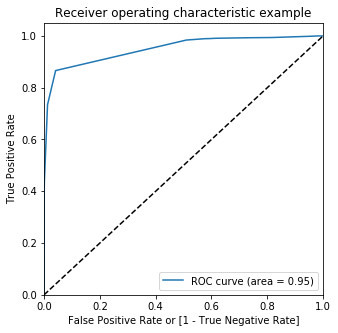

In [81]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conv_Prob, drop_intermediate = False)
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

### Finding Optimal cut-off point

In [82]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,ProspectID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.005217,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.137149,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.005217,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.078984,8105,0,1,0,0,0,0,0,0,0,0,0
4,0,0.137149,3934,0,1,1,0,0,0,0,0,0,0,0


In [83]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.677953  0.984185  0.489255
0.2   0.2  0.923624  0.866180  0.959020
0.3   0.3  0.922696  0.863341  0.959270
0.4   0.4  0.922696  0.863341  0.959270
0.5   0.5  0.922696  0.863341  0.959270
0.6   0.6  0.922696  0.863341  0.959270
0.7   0.7  0.922696  0.863341  0.959270
0.8   0.8  0.891156  0.734793  0.987506
0.9   0.9  0.891156  0.734793  0.987506


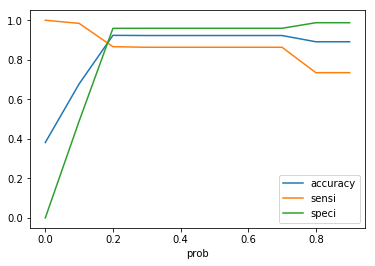

In [84]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the above graph, we see that the optimal cut-off is 0.2

In [85]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Converted,Conv_Prob,ProspectID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.005217,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.137149,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.005217,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.078984,8105,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.137149,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [86]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9236239950525664

In [87]:
#confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3838,  164],
       [ 330, 2136]], dtype=int64)

In [88]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#Lets see the sensitivity and specificity of our model
print("Sensitivity of our model is:",100*(TP / float(TP+FN)))
print("Specificity of our model is:",100*(TN / float(TN+FP)))

#Checking our false positive rate - predicting conversion when candidate has not converted
print("False positive rate is",100*(FP/ float(TN+FP)))

Sensitivity of our model is: 86.61800486618006
Specificity of our model is: 95.90204897551224
False positive rate is 4.097951024487756


In [89]:
# positive predictive value and negative predictive value
print ("The positive predictive value is:",100*(TP / float(TP+FP)))
print ("The negative predictive value is:",100*(TN / float(TN+ FN)))


The positive predictive value is: 92.8695652173913
The negative predictive value is: 92.08253358925144


## 8. Precision and Recall

- Precision = TP / TP + FP
- Recall = TP / TP + FN

In [90]:
print("Precision:",confusion[1,1]/(confusion[0,1]+confusion[1,1]))
print("Recall:",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Precision: 0.9288830715532286
Recall: 0.8633414436334145


In [91]:
from sklearn.metrics import precision_score, recall_score

In [92]:
#precision
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9288830715532286

In [93]:
#recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8633414436334145

### Precision and Recall tradeoff

In [94]:
from sklearn.metrics import precision_recall_curve

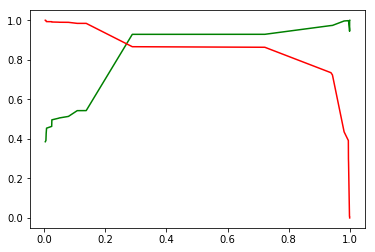

In [95]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## 9. Making predictions on the test set

In [96]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

C:\Users\sneha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [97]:
X_test = X_test[col]
X_test.head()

,Lead Source_Welingak Website,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Last Notable Activity_SMS Sent
4269,0,0,0,0,0,0,0,0,0,0,0,0,1
2376,0,0,0,0,0,0,0,0,1,0,0,0,1
7766,0,0,0,0,0,0,0,0,1,0,0,0,0
9199,0,1,0,0,0,0,0,0,0,0,0,0,0
4359,0,0,0,0,0,0,0,0,1,0,0,0,0


In [98]:
X_test_sm = sm.add_constant(X_test)

In [99]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4269    0.722140
2376    0.996356
7766    0.943579
9199    0.006098
4359    0.943579
9186    0.996356
1631    0.943579
8963    0.943579
8007    0.137149
5324    0.996356
dtype: float64

In [100]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [101]:
# Let's see the head
y_pred_1.head()

,0
4269,0.722140
2376,0.996356
7766,0.943579
9199,0.006098
4359,0.943579


In [102]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [103]:
# Putting ProspectID as an index
y_test_df['ProspectID'] = y_test_df.index

In [104]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [105]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [106]:
y_pred_final.head()

,Converted,ProspectID,0
0,1,4269,0.722140
1,1,2376,0.996356
2,1,7766,0.943579
3,0,9199,0.006098
4,1,4359,0.943579


In [107]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conv_Prob'})

In [108]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['ProspectID','Converted','Conv_Prob'], axis=1)

In [109]:
# Let's see the head of y_pred_final
y_pred_final.head()

,ProspectID,Converted,Conv_Prob
0,4269,1,0.722140
1,2376,1,0.996356
2,7766,1,0.943579
3,9199,0,0.006098
4,4359,1,0.943579


In [110]:
y_pred_final['final_predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.2 else 0)
temp_df2 = y_pred_final 

In [111]:
y_pred_final.head()

,ProspectID,Converted,Conv_Prob,final_predicted
0,4269,1,0.722140,1
1,2376,1,0.996356,1
2,7766,1,0.943579,1
3,9199,0,0.006098,0
4,4359,1,0.943579,1


In [112]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9246031746031746

In [113]:
#confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1599,   78],
       [ 131,  964]], dtype=int64)

In [114]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#Checking sensitivity and specificity of our model
print("Sensitivity of our model is:",100*(TP / float(TP+FN)))
print("Specificity of our model is:",100*(TN / float(TN+FP)))

#Checking our false positive rate - predicting conversion when candidate has not converted
print("False positive rate is",100*(FP/ float(TN+FP)))

Sensitivity of our model is: 88.03652968036529
Specificity of our model is: 95.34883720930233
False positive rate is 4.651162790697675


In [115]:
#temp_df is the final train data set
temp_df['Probability of Conversion'] = temp_df['Conv_Prob']*100
temp_df.drop(['Conv_Prob'],axis=1, inplace=True)
temp_df.head()

,Converted,ProspectID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Probability of Conversion
0,0,1871,0,1,0,0,0,0,0,0,0,0,0,0,0.521745
1,0,6795,0,1,1,0,0,0,0,0,0,0,0,0,13.714866
2,0,3516,0,1,0,0,0,0,0,0,0,0,0,0,0.521745
3,0,8105,0,1,0,0,0,0,0,0,0,0,0,0,7.898383
4,0,3934,0,1,1,0,0,0,0,0,0,0,0,0,13.714866


##### The probability of conversion is the score on a scale of 0-100 that gives the probability that the candidate will convert

In [116]:
temp_df2['Probability of Conversion'] = temp_df2['Conv_Prob']*100
temp_df2.drop(['final_predicted','Conv_Prob'],axis=1, inplace=True)
temp_df2.head()

,ProspectID,Converted,Probability of Conversion
0,4269,1,72.214046
1,2376,1,99.635639
2,7766,1,94.357949
3,9199,0,0.609756
4,4359,1,94.357949


In [117]:
#Choosing all required columns in the final train set
temp_df = temp_df[['ProspectID','Converted','Probability of Conversion']]

In [118]:
final_df = pd.concat([temp_df,temp_df2])

In [119]:
final_df.head()

,ProspectID,Converted,Probability of Conversion
0,1871,0,0.521745
1,6795,0,13.714866
2,3516,0,0.521745
3,8105,0,7.898383
4,3934,0,13.714866


In [120]:
final_df.shape

(9240, 3)

#### We have retained all rows as the original data set, hence our model gives the probability of prediction for all candidates

### Final variables chosen by the model:
1. Tags_switched off 
2. Lead Source_Welingak Website
3. Tags_Closed by Horizzon
4. Tags_invalid number
5. Tags_Interested in full time MBA
6. Tags_Lost to EINS
7. Tags_Not doing further education
8. Tags_Ringing
9. Tags_Will revert after reading the email
10. Tags_invalid number
11. Tags_switched off
12. Tags_wrong number given
13. Last Notable Activity_SMS Sent
14. Tags_number not provided
15. Tags_switched off
16. Tags_wrong number given
17. Last Notable Activity_SMS Sent

# Second model Option

## Since most of the features that the model has considered belong to 'Tags', which is data inputted by the Sales team, we will also create a model that does not depend on this data

- In order to reduce human effort dependency, we will create another model that does not consider any data that the Sales team has input themselves
- This will help reduce model dependency on human effort as well as reduce the error in prediction due to human error
- This model will be helpful even if the sales team doesn't input all of the data during sales calls

In [121]:
#Removing any columns that are input by the sales team through their intuition or business experience
leads_df.drop(['Tags'],axis=1,inplace=True)

In [122]:
leads_df3 = pd.get_dummies(leads_df) 

In [123]:
# Putting feature variable to X
X = leads_df3.drop(['Lead Number','Converted'], axis=1)

In [124]:
# Putting response variable in y
y = leads_df3['Converted']

In [125]:
#Splitting the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [126]:
#Feature Standardization
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit',]] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

C:\Users\sneha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sneha\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [127]:
#Dropping highly correlated variables
leads_df3_corr = leads_df3.corr().abs()
upper = leads_df_corr.where(np.triu(np.ones(leads_df_corr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

[]

In [128]:
#We see that there are no variables to drop

#### Model Building

In [129]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                          111
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 26 Aug 2019   Deviance:                          nan
Time:                        23:54:30   Pearson chi2:                 6.55e+18
No. Iterations:                   100   Covariance Type:             nonrobust
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    1.342e+14   1.77e+07   7.59e+06      0.000    1.34e+14    1.34e+14
Do Not Email                                                            -4.821e+14   3.51e+06  -1.37e+08      0.000   -4.82e+14   -4.82e+14
Do Not Call                                                              9.106e+15   4.77e+07   1.91e+08      0.000    9.11e+15    9.11e+15
TotalVisits                                                                8.3e+13   9.95e+05   8.34e+07      0.000     8.3e+13     8.3e+13
Total Time Spent on Website                                               7.31e+14    9.5e+05   7.69e+08      0.000    7.31e+14    7.31e+14
Page Views Per Visit                                                    -9.125e+13   1.19e+06   -7.7e+07      0.000   -9.12e+13   -9.12e+13
Search                                                                  -2.985e+14   2.21e+07  -1.35e+07      0.000   -2.98e+14   -2.98e+14
Newspaper Article                                                        3.804e+14   6.73e+07   5.65e+06      0.000     3.8e+14     3.8e+14
X Education Forums                                                      -1.466e+16   1.11e+08  -1.32e+08      0.000   -1.47e+16   -1.47e+16
Newspaper                                                               -2.627e+15   6.73e+07   -3.9e+07      0.000   -2.63e+15   -2.63e+15
Digital Advertisement                                                   -1.146e+15   4.77e+07   -2.4e+07      0.000   -1.15e+15   -1.15e+15
Through Recommendations                                                  6.236e+13   2.86e+07   2.18e+06      0.000    6.24e+13    6.24e+13
A free copy of Mastering The Interview                                  -1.944e+14   2.71e+06  -7.19e+07      0.000   -1.94e+14   -1.94e+14
Lead Origin_API                                                         -1.668e+15   1.59e+07  -1.05e+08      0.000   -1.67e+15   -1.67e+15
Lead Origin_Landing Page Submission                                     -1.718e+15   1.59e+07  -1.08e+08      0.000   -1.72e+15   -1.72e+15
Lead Origin_Lead Add Form                                                7.185e+13   1.87e+07   3.85e+06      0.000    7.19e+13    7.19e+13
Lead Origin_Lead Import                                                 -1.051e+15   4.17e+07  -2.52e+07      0.000   -1.05e+15   -1.05e+15
Lead Origin_Quick Add Form                                               4.499e+15   5.65e+07   7.97e+07      0.000     4.5e+15     4.5e+15
Lead Source_Click2call                                                  -2.485e+15   3.97e+07  -6.25e+07      0.000   -2.49e+15   -2.49e+15
Lead Source_Direct Traffic                                              -1.966e+14

In [130]:
rfe = RFE(logreg, 15)           
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       ...
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=112)

In [131]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2699.0
Date:                Mon, 26 Aug 2019   Deviance:                       5398.0
Time:                        23:54:49   Pearson chi2:                 7.57e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4543      0.122     -3.739      0.000      -0.692      -0.216
Do Not Email                                            -1.2983      0.164     -7.908      0.000      -1.620      -0.977
Total Time Spent on Website                              1.0829      0.039     27.479      0.000       1.006       1.160
Lead Origin_Landing Page Submission                     -1.0890      0.126     -8.611      0.000      -1.337      -0.841
Lead Origin_Lead Add Form                                3.2354      0.205     15.820      0.000       2.835       3.636
Lead Source_Olark Chat                                   0.8614      0.118      7.318      0.000       0.631       1.092
Lead Source_Welingak Website                             2.5926      0.748      3.467      0.001       1.127       4.058
Country_Qatar                                          -23.1667   2.39e+04     -0.001      0.999   -4.68e+04    4.68e+04
Specialization_Hospitality Management                   -1.0621      0.328     -3.237      0.001      -1.705      -0.419
Specialization_No Specialization                        -1.2224      0.121    -10.104      0.000      -1.460      -0.985
What is your current occupation_Housewife               24.0082   2.18e+04      0.001      0.999   -4.27e+04    4.28e+04
What is your current occupation_Working Professional     2.6112      0.192     13.633      0.000       2.236       2.987
Last Notable Activity_Had a Phone Conversation           3.5433      1.105      3.205      0.001       1.377       5.710
Last Notable Activity_Olark Chat Conversation           -0.8441      0.337     -2.503      0.012      -1.505      -0.183
Last Notable Activity_SMS Sent                           1.7010      0.078     21.713      0.000       1.547       1.855
Last Notable Activity_Unreachable                        1.8046      0.520      3.472      0.001       0.786       2.823
========================================================================================================================
"""

In [132]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3839  163]
 [ 337 2129]]


In [133]:
#Since the p value of Qatar is high, dropping that column
col = col.drop('Country_Qatar')

In [134]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2702.8
Date:                Mon, 26 Aug 2019   Deviance:                       5405.7
Time:                        23:54:49   Pearson chi2:                 7.57e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4543      0.121     -3.740      0.000      -0.692      -0.216
Do Not Email                                            -1.2946      0.164     -7.887      0.000      -1.616      -0.973
Total Time Spent on Website                              1.0813      0.039     27.479      0.000       1.004       1.158
Lead Origin_Landing Page Submission                     -1.0930      0.126     -8.646      0.000      -1.341      -0.845
Lead Origin_Lead Add Form                                3.2336      0.204     15.816      0.000       2.833       3.634
Lead Source_Olark Chat                                   0.8599      0.118      7.309      0.000       0.629       1.090
Lead Source_Welingak Website                             2.5922      0.748      3.466      0.001       1.127       4.058
Specialization_Hospitality Management                   -1.0575      0.328     -3.223      0.001      -1.701      -0.414
Specialization_No Specialization                        -1.2219      0.121    -10.102      0.000      -1.459      -0.985
What is your current occupation_Housewife               23.0115   1.32e+04      0.002      0.999   -2.59e+04     2.6e+04
What is your current occupation_Working Professional     2.6147      0.192     13.653      0.000       2.239       2.990
Last Notable Activity_Had a Phone Conversation           3.5460      1.105      3.208      0.001       1.379       5.712
Last Notable Activity_Olark Chat Conversation           -0.8429      0.337     -2.500      0.012      -1.504      -0.182
Last Notable Activity_SMS Sent                           1.6991      0.078     21.714      0.000       1.546       1.852
Last Notable Activity_Unreachable                        1.8064      0.520      3.476      0.001       0.788       2.825
========================================================================================================================
"""

In [135]:
#The p value of Occupation as Housewife is also high, dropping this column as well
col = col.drop('What is your current occupation_Housewife')
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2710.1
Date:                Mon, 26 Aug 2019   Deviance:                       5420.2
Time:                        23:54:50   Pearson chi2:                 7.59e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4489      0.121     -3.698      0.000      -0.687      -0.211
Do Not Email                                            -1.3005      0.164     -7.925      0.000      -1.622      -0.979
Total Time Spent on Website                              1.0802      0.039     27.487      0.000       1.003       1.157
Lead Origin_Landing Page Submission                     -1.0877      0.126     -8.611      0.000      -1.335      -0.840
Lead Origin_Lead Add Form                                3.2467      0.204     15.902      0.000       2.847       3.647
Lead Source_Olark Chat                                   0.8589      0.118      7.305      0.000       0.628       1.089
Lead Source_Welingak Website                             2.5790      0.748      3.449      0.001       1.113       4.045
Specialization_Hospitality Management                   -1.0643      0.328     -3.245      0.001      -1.707      -0.421
Specialization_No Specialization                        -1.2257      0.121    -10.141      0.000      -1.463      -0.989
What is your current occupation_Working Professional     2.6072      0.191     13.619      0.000       2.232       2.982
Last Notable Activity_Had a Phone Conversation           3.5357      1.105      3.199      0.001       1.369       5.702
Last Notable Activity_Olark Chat Conversation           -0.8456      0.337     -2.508      0.012      -1.506      -0.185
Last Notable Activity_SMS Sent                           1.6919      0.078     21.641      0.000       1.539       1.845
Last Notable Activity_Unreachable                        1.7986      0.520      3.461      0.001       0.780       2.817
========================================================================================================================
"""

In [136]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.36670651, 0.05973749, 0.1732739 , 0.83616631, 0.1452806 ,
       0.99163104, 0.08907288, 0.99407543, 0.26499419, 0.89568306])

In [137]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['ProspectID'] = y_train.index
temp_df = y_train_pred_final
y_train_pred_final.head()

,Converted,Conv_Prob,ProspectID
0,0,0.366707,1871
1,0,0.059737,6795
2,0,0.173274,3516
3,0,0.836166,8105
4,0,0.145281,3934


In [138]:
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conv_Prob,ProspectID,predicted
0,0,0.366707,1871,0
1,0,0.059737,6795,0
2,0,0.173274,3516,0
3,0,0.836166,8105,1
4,0,0.145281,3934,0


In [139]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8064316635745207


In [140]:
#Checking VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_Olark Chat,1.88
7,Specialization_No Specialization,1.85
3,Lead Origin_Lead Add Form,1.45
11,Last Notable Activity_SMS Sent,1.37
2,Lead Origin_Landing Page Submission,1.35
5,Lead Source_Welingak Website,1.26
1,Total Time Spent on Website,1.24
8,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.10
10,Last Notable Activity_Olark Chat Conversation,1.06


In [141]:
#Plotting the ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conv_Prob, drop_intermediate = False )

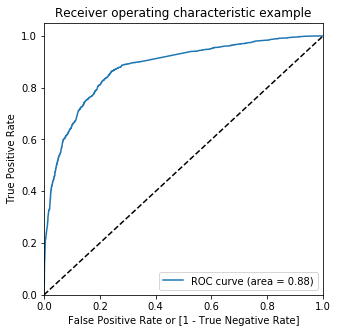

In [142]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

In [143]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

C:\Users\sneha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [144]:
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4269    0.742526
2376    0.909510
7766    0.957598
9199    0.145281
4359    0.863124
9186    0.600732
1631    0.379696
8963    0.108970
8007    0.140264
5324    0.381107
dtype: float64

In [145]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
y_test_df['ProspectID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conv_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['ProspectID','Converted','Conv_Prob'], axis=1)

# Let's see the head of y_pred_final
y_pred_final.head()

,ProspectID,Converted,Conv_Prob
0,4269,1,0.742526
1,2376,1,0.909510
2,7766,1,0.957598
3,9199,0,0.145281
4,4359,1,0.863124


In [146]:
y_pred_final['final_predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.3 else 0)
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8023088023088023

In [147]:
y_train_pred_final['Probablity of Conversion'] = y_train_pred_final['Conv_Prob']*100

#Creating the final train data set
train_final = y_train_pred_final[['ProspectID','Converted','Probablity of Conversion']]

#Creating the final test data set
y_pred_final['Probablity of Conversion'] = y_pred_final['Conv_Prob']*100
y_pred_final.drop(['Conv_Prob','final_predicted'],1,inplace=True)
test_final = y_pred_final
final_df_2 = pd.concat([train_final,test_final])

In [148]:
final_df_2.head()

,ProspectID,Converted,Probablity of Conversion
0,1871,0,36.670651
1,6795,0,5.973749
2,3516,0,17.327390
3,8105,0,83.616631
4,3934,0,14.528060


In [149]:
final_df_2.shape

(9240, 3)

### Final variables chosen by model 2:
1. Lead Source_Olark Chat
2. Specialization_No Specialization
3. Lead Origin_Lead Add Form
4. Last Notable Activity_SMS Sent
5. Lead Origin_Landing Page Submission
6. Lead Source_Welingak Website
7. Total Time Spent on Website
8. What is your current occupation_Working Professional
9. Do Not Email
10.  Last Notable Activity_Olark Chat Conversation
11. Specialization_Hospitality Management
12. Last Notable Activity_Had a Phone Conversation
13. Last Notable Activity_Unreachable